<a href="https://colab.research.google.com/github/AdrianaTrejo/Mineria-de-Datos/blob/main/Tecnicas_de_mineria_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **EQUIPO #7**
* **Grupo:** 001 , Lunes(7:00-10:00)
* **Integrantes:** 
 * 1853256  Trejo Rodriguez Adriana Jackeline
 * 1848627 Villegas Kane Aaron
 * 1866054 Pasillas Moreno Jesus
 * 1855060 Salazar Narvaez Daniela
 * 1850325 Hernandez Gonzalez Omar


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder


In [ ]:
import pandas as pd
import numpy as np
import json
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
x=heart.iloc[:,0:12].values
y=heart.iloc[:, 12].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[45,  3],
       [ 8, 19]])

In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("F1 score: ", metrics.f1_score(y_test,y_pred, average='weighted'))
print("ROC: ", metrics.accuracy_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred, average='weighted'))


Accuracy:  0.8533333333333334
F1 score:  0.8494807031723581
ROC:  0.8533333333333334
Recall:  0.8533333333333334


In [ ]:
from sklearn import tree
tree.export_graphviz(classifier,out_file='tree_social.dot')

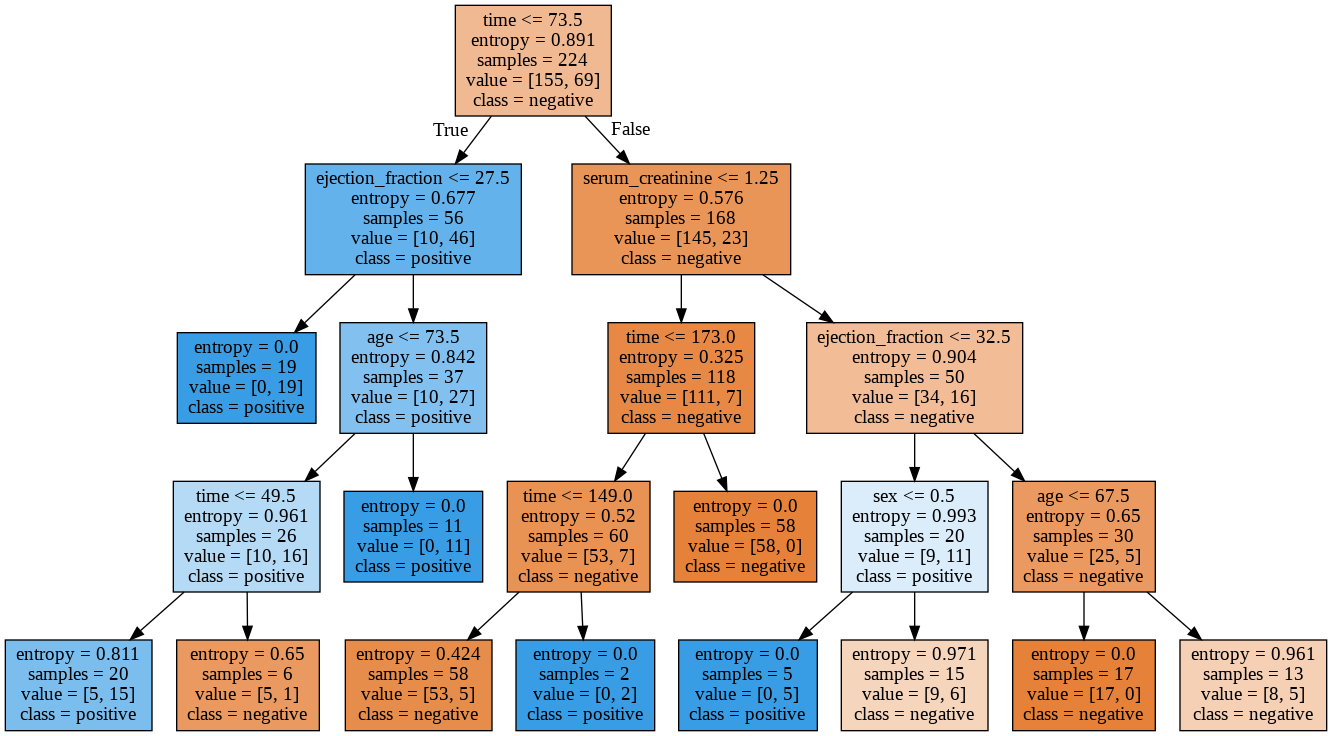

In [ ]:
dot_data=tree.export_graphviz(classifier,
                              out_file=None,
                              class_names=['negative','positive'],
                              feature_names=list(heart.drop(['DEATH_EVENT'],axis=1)),
                              filled=True
                              )
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

FUENTE: https://www.youtube.com/watch?v=am8vrV967FA

Con la grafica obtenida podemos ver como la variable mas inluyente es la variable "time" que signfica el tiempo de seguimiento del paciente, al ser la variable que se encuentra mas arriba de la grafica, siguiendole las variables "ejection_fraaction" y "serum_creatinine" cumpliendo nuestro objetivo al usar esta tecnica